<a href="https://colab.research.google.com/github/MelvinaSyahputriKabeakan/CV_OrchidDetection/blob/main/CNN_Deteksi_Anggrek_Melvina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications import MobileNetV2 # Import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense # Import layers
from tensorflow.keras.models import Model # Import Model
from tensorflow.keras.optimizers import Adam # Import Adam optimizer
import os

In [ ]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path ke file ZIP
zip_path = '/content/drive/MyDrive/UTS_CV/Orchid.zip'

# Folder tujuan ekstrak
extract_to = '/Orchid/dataset'

# Ekstrak file ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Selesai ekstrak ke:", extract_to)

# Lihat isi folder yang sudah diekstrak
print("Isi folder:", os.listdir(extract_to))


Mounted at /content/drive
Selesai ekstrak ke: /Orchid/dataset
Isi folder: ['Orchid']


In [ ]:
base_dir = '/Orchid/dataset/Orchid'   # folder yang sebenarnya memuat data
print("Isi base_dir:", os.listdir(base_dir))

Isi base_dir: ['Phalaenopsis', 'Vanda', 'Dendrobium', 'Cattleya', 'Paphiopedilum', 'Vanilla']


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import shutil
import random

source_dir = "images"  # folder asal, berisi 6 folder kelas
target_base = "Orchid/dataset"  # folder tujuan
split_ratio = (0.7, 0.2, 0.1)  # train, val, test

# Loop per kelas
for class_name in os.listdir(base_dir):
    class_path = os.path.join(base_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.shuffle(images)

    n_total = len(images)
    n_train = int(split_ratio[0] * n_total)
    n_val = int(split_ratio[1] * n_total)

    splits = {
        "train": images[:n_train],
        "val": images[n_train:n_train + n_val],
        "test": images[n_train + n_val:]
    }

    for split_name, file_list in splits.items():
        dest_dir = os.path.join(target_base, split_name, class_name)
        os.makedirs(dest_dir, exist_ok=True)
        for filename in file_list:
            src_file = os.path.join(class_path, filename)
            dst_file = os.path.join(dest_dir, filename)
            shutil.copy(src_file, dst_file)


In [ ]:
print(os.listdir("Orchid/dataset/train"))
print(os.listdir("Orchid/dataset/val"))
print(os.listdir("Orchid/dataset/test"))


['Phalaenopsis', 'Vanda', 'Dendrobium', 'Cattleya', 'Paphiopedilum', 'Vanilla']
['Phalaenopsis', 'Vanda', 'Dendrobium', 'Cattleya', 'Paphiopedilum', 'Vanilla']
['Phalaenopsis', 'Vanda', 'Dendrobium', 'Cattleya', 'Paphiopedilum', 'Vanilla']


In [ ]:
import os

base_path = "Orchid/dataset/train"
print(os.listdir(base_path))  # Harusnya: ['Cattleya', 'Dendrobium', ...]



['Phalaenopsis', 'Vanda', 'Dendrobium', 'Cattleya', 'Paphiopedilum', 'Vanilla']


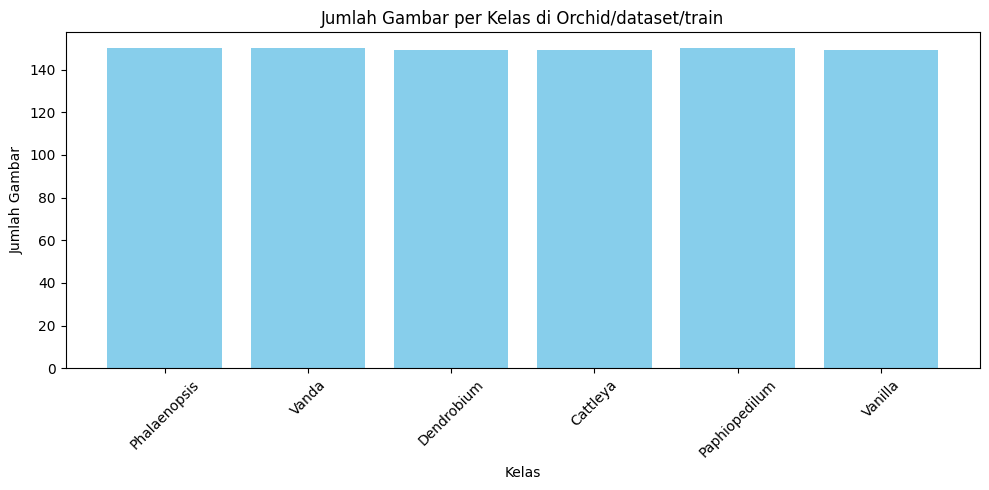

In [ ]:
import os
import matplotlib.pyplot as plt

# Ganti path ini sesuai lokasi folder train/val/test yang ingin kamu cek
folder_path = 'Orchid/dataset/train'  # bisa juga 'dataset/val' atau 'dataset/test'

class_counts = {}

# Loop setiap folder kelas
for class_name in os.listdir(folder_path):
    class_dir = os.path.join(folder_path, class_name)
    if os.path.isdir(class_dir):
        image_count = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = image_count

# Plot
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Jumlah Gambar per Kelas di ' + folder_path)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import os

def dataset_info(base_dir):
    total_images = 0
    info = {}

    for split in ['train', 'val', 'test']:
        split_path = os.path.join(base_dir, split)
        if not os.path.exists(split_path):
            continue

        split_info = {}
        split_total = 0

        for class_name in os.listdir(split_path):
            class_path = os.path.join(split_path, class_name)
            if not os.path.isdir(class_path):
                continue

            count = len([
                f for f in os.listdir(class_path)
                if f.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])
            split_info[class_name] = count
            split_total += count

        info[split] = {
            'total': split_total,
            'per_class': split_info
        }
        total_images += split_total

    # Print info
    print("📊 Dataset Info")
    print(f"Total Images: {total_images}")
    for split in info:
        print(f"\n📁 {split.upper()} SET")
        print(f"  Total: {info[split]['total']}")
        for cls, count in info[split]['per_class'].items():
            print(f"    - {cls}: {count} images")

# Jalankan fungsi untuk folder 'dataset'
dataset_info("Orchid/dataset")


📊 Dataset Info
Total Images: 1286

📁 TRAIN SET
  Total: 897
    - Phalaenopsis: 150 images
    - Vanda: 150 images
    - Dendrobium: 149 images
    - Cattleya: 149 images
    - Paphiopedilum: 150 images
    - Vanilla: 149 images

📁 VAL SET
  Total: 255
    - Phalaenopsis: 43 images
    - Vanda: 43 images
    - Dendrobium: 42 images
    - Cattleya: 42 images
    - Paphiopedilum: 43 images
    - Vanilla: 42 images

📁 TEST SET
  Total: 134
    - Phalaenopsis: 22 images
    - Vanda: 22 images
    - Dendrobium: 22 images
    - Cattleya: 23 images
    - Paphiopedilum: 22 images
    - Vanilla: 23 images


In [ ]:
print(os.listdir("Orchid/dataset/train/Cattleya"))

['20.significado-de-cattleya.jpg', '313.Orqu%C3%ADdea-Cattleya-Amarela.jpg', '351.cattleya-peckaviensis-sobral.jpg', '310.Cattleya-Ficha-T%C3%A9cnica-Y-Cuidados-602x220.jpg', '175.img-jcw9GsIgDADQ2zCSlkEnJgdXrxBLpPRLCPIjPb6DF3B62zN5iqGDtqrFn2b61S2L2X9MKT6opJy0gdb3SIGw0QctnaPJ4J6EQkK7qUBhzD0xYwO3rBcwLw8PjHQnrDfWEWDOCXsXhhIJ_n5HYcUAT9YI7mqPEr8.jpeg', '231.CA2037.png', '219.cattleya-velvet-star-hibrido-nuevo-bluhstarke-planta-orquidea-orquideas-24839071.jpg', '297.Cattleya-04.jpg', '212.sbn20-1ec82e78acab4aff3815126411507358-1024-1024.jpg', '188.1452644677059.jpeg', '278.rosa-jaguar-h%C3%ADbrido-de-cattleya-la-orqu%C3%ADdea-111778427.jpg', '34.orquidea-cattleya_5704344.jpg', '180.Cattleya-warscewiczii-1d.jpg', '222.cattleya-orchid.jpg', '335.cattiricolor.jpg', '247.Cattleya-aurantiaca-750x500.jpg', '226.cattleya-violacea-x-maxima-c-walther-wolff.jpg', '220.Orquidea-Cattleya-partes-de-la-flor-e1510784707989.jpg', '333.cf53146aa44ade3412a3e47e57b3c16e--fire-magic-solar-flares.jpg', '28.orqu

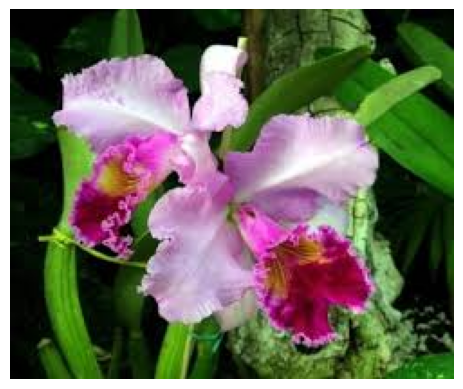

In [ ]:
from keras.preprocessing import image
from keras.utils import load_img

import matplotlib.pyplot as plt
import matplotlib.image as mping
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

img = image.load_img('Orchid/dataset/train/Cattleya/42.Cattleya_T.jpeg')
implot=plt.imshow(img)

plt.axis('off')  # Hide the axis
plt.show()  # Show the im

In [ ]:
from PIL import Image
import os
from collections import Counter

folder_path = "Orchid/dataset/train"  # ganti sesuai folder yang ingin dicek
image_sizes = []

# Telusuri semua folder kelas
for class_name in os.listdir(folder_path):
    class_dir = os.path.join(folder_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    for img_name in os.listdir(class_dir):
        if img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            img_path = os.path.join(class_dir, img_name)
            try:
                with Image.open(img_path) as img:
                    image_sizes.append(img.size)  # (width, height)
            except Exception as e:
                print(f"❌ Gagal buka: {img_path} - {e}")

# Hitung jumlah ukuran unik
size_counts = Counter(image_sizes)

print(f"\n📊 Jumlah gambar: {len(image_sizes)}")
print("📏 Ukuran gambar yang ditemukan:")
for size, count in size_counts.items():
    print(f"  - {size} : {count} file(s)")

# Cek apakah semua gambar punya ukuran yang sama
if len(size_counts) == 1:
    print("\n✅ Semua gambar punya ukuran yang sama.")
else:
    print("\n⚠️ Ukuran gambar bervariasi. Pertimbangkan untuk resize saat preprocessing.")



📊 Jumlah gambar: 897
📏 Ukuran gambar yang ditemukan:
  - (440, 440) : 1 file(s)
  - (800, 600) : 19 file(s)
  - (540, 960) : 1 file(s)
  - (800, 800) : 27 file(s)
  - (668, 400) : 1 file(s)
  - (345, 377) : 1 file(s)
  - (750, 900) : 1 file(s)
  - (830, 830) : 1 file(s)
  - (607, 402) : 1 file(s)
  - (500, 749) : 1 file(s)
  - (741, 600) : 1 file(s)
  - (600, 400) : 11 file(s)
  - (450, 600) : 12 file(s)
  - (770, 770) : 1 file(s)
  - (530, 530) : 3 file(s)
  - (450, 300) : 5 file(s)
  - (700, 441) : 1 file(s)
  - (425, 425) : 3 file(s)
  - (620, 555) : 1 file(s)
  - (500, 500) : 17 file(s)
  - (796, 700) : 1 file(s)
  - (600, 800) : 5 file(s)
  - (300, 450) : 5 file(s)
  - (400, 400) : 11 file(s)
  - (458, 458) : 12 file(s)
  - (700, 466) : 1 file(s)
  - (650, 481) : 1 file(s)
  - (473, 315) : 2 file(s)
  - (480, 360) : 4 file(s)
  - (576, 720) : 1 file(s)
  - (600, 600) : 29 file(s)
  - (480, 480) : 8 file(s)
  - (1024, 680) : 2 file(s)
  - (728, 960) : 1 file(s)
  - (750, 750) : 2 

In [ ]:
from PIL import Image, UnidentifiedImageError
import os

base_dirs = ["Orchid/dataset/train", "Orchid/dataset/val", "Orchid/dataset/test"]
target_size = (224, 224)

for base_dir in base_dirs:
    for class_name in os.listdir(base_dir):
        class_path = os.path.join(base_dir, class_name)

        if not os.path.isdir(class_path):
            continue

        for filename in os.listdir(class_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_path = os.path.join(class_path, filename)

                try:
                    img = Image.open(img_path)
                    img = img.resize(target_size)
                    img = img.convert("RGB")
                    img.save(img_path)

                except (UnidentifiedImageError, OSError) as e:
                    print(f"❌ Gagal proses, hapus file rusak: {img_path}")
                    os.remove(img_path)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os

# Path ke folder dataset training asli
train_path = 'Orchid/dataset/train'

# Buat ImageDataGenerator khusus untuk augmentasi (tanpa rescale karena hanya simpan)
augmentor = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Untuk setiap kelas di dataset training
for class_name in os.listdir(train_path):
    class_dir = os.path.join(train_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = [f for f in os.listdir(class_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    for img_name in images:
        img_path = os.path.join(class_dir, img_name)

        try:
            # Load gambar
            img = load_img(img_path)
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)

            # Simpan 5 hasil augmentasi dari tiap gambar
            i = 0
            for batch in augmentor.flow(x, batch_size=1, save_to_dir=class_dir,
                                        save_prefix='aug', save_format='jpg'):
                i += 1
                if i >= 5:
                    break
        except Exception as e:
            print(f"Gagal augmentasi {img_path} karena: {e}")


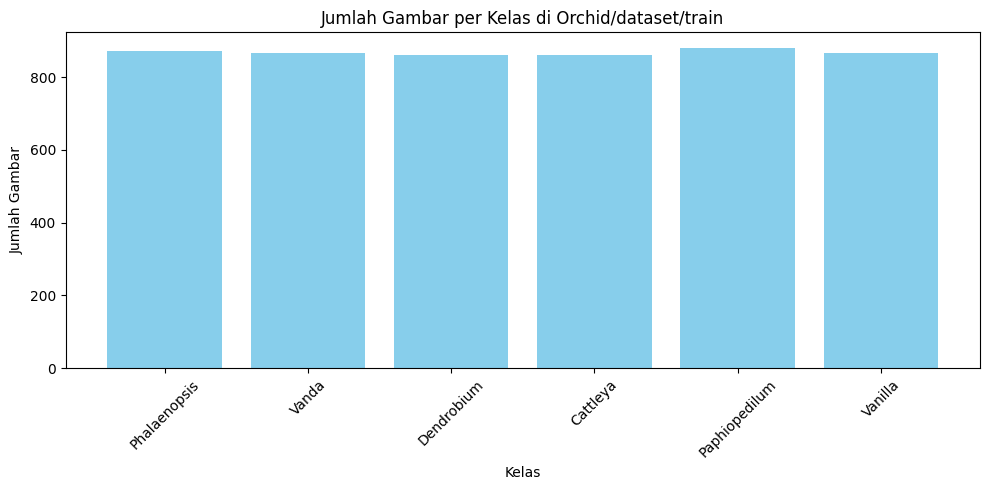

In [ ]:
# Ganti path ini sesuai lokasi folder train/val/test yang ingin kamu cek
folder_path = 'Orchid/dataset/train'  # bisa juga 'dataset/val' atau 'dataset/test'

class_counts = {}

# Loop setiap folder kelas
for class_name in os.listdir(folder_path):
    class_dir = os.path.join(folder_path, class_name)
    if os.path.isdir(class_dir):
        image_count = len([
            f for f in os.listdir(class_dir)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ])
        class_counts[class_name] = image_count

# Plot
plt.figure(figsize=(10, 5))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Jumlah Gambar per Kelas di ' + folder_path)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.2  # 20% untuk validasi
)

train_generator = train_datagen.flow_from_directory(
    'Orchid/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    'Orchid/dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 4165 images belonging to 6 classes.
Found 1039 images belonging to 6 classes.


In [ ]:
val_generator

In [ ]:
# Load MobileNetV2 tanpa fully connected layer, pretrained ImageNet
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze base model
base_model.trainable = False

# Tambahkan custom classifier di atasnya
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(6, activation='softmax')(x)  # 6 kelas anggrek

model = Model(inputs=base_model.input, outputs=output)

# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_mobilenetv2.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
]


In [ ]:
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2301 - loss: 2.0118

131/131 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.2306 - loss: 2.0098 - val_accuracy: 0.5746 - val_loss: 1.2539 - learning_rate: 1.0000e-04
Epoch 2/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4586 - loss: 1.4130

131/131 ━━━━━━━━━━━━━━━━━━━━ 308s 2s/step - accuracy: 0.4588 - loss: 1.4125 - val_accuracy: 0.6583 - val_loss: 1.0181 - learning_rate: 1.0000e-04
Epoch 3/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5498 - loss: 1.2163

131/131 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.5499 - loss: 1.2161 - val_accuracy: 0.6776 - val_loss: 0.9472 - learning_rate: 1.0000e-04
Epoch 4/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5977 - loss: 1.1035

131/131 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.5978 - loss: 1.1032 - val_accuracy: 0.7238 - val_loss: 0.8446 - learning_rate: 1.0000e-04
Epoch 5/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6180 - loss: 1.0410

131/131 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.6180 - loss: 1.0409 - val_accuracy: 0.7190 - val_loss: 0.8022 - learning_rate: 1.0000e-04
Epoch 6/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6485 - loss: 0.9870

131/131 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.6485 - loss: 0.9868 - val_accuracy: 0.7315 - val_loss: 0.7599 - learning_rate: 1.0000e-04
Epoch 7/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6728 - loss: 0.9234

131/131 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - accuracy: 0.6728 - loss: 0.9234 - val_accuracy: 0.7411 - val_loss: 0.7327 - learning_rate: 1.0000e-04
Epoch 8/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6878 - loss: 0.8665

131/131 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.6878 - loss: 0.8666 - val_accuracy: 0.7709 - val_loss: 0.6917 - learning_rate: 1.0000e-04
Epoch 9/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6845 - loss: 0.8698

131/131 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.6846 - loss: 0.8697 - val_accuracy: 0.7863 - val_loss: 0.6492 - learning_rate: 1.0000e-04
Epoch 10/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7088 - loss: 0.8252

131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7087 - loss: 0.8252 - val_accuracy: 0.7844 - val_loss: 0.6456 - learning_rate: 1.0000e-04
Epoch 11/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6961 - loss: 0.8037

131/131 ━━━━━━━━━━━━━━━━━━━━ 305s 2s/step - accuracy: 0.6962 - loss: 0.8037 - val_accuracy: 0.7911 - val_loss: 0.6139 - learning_rate: 1.0000e-04
Epoch 12/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7300 - loss: 0.7818

131/131 ━━━━━━━━━━━━━━━━━━━━ 318s 2s/step - accuracy: 0.7300 - loss: 0.7817 - val_accuracy: 0.8008 - val_loss: 0.6062 - learning_rate: 1.0000e-04
Epoch 13/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7314 - loss: 0.7654

131/131 ━━━━━━━━━━━━━━━━━━━━ 309s 2s/step - accuracy: 0.7314 - loss: 0.7655 - val_accuracy: 0.8181 - val_loss: 0.5627 - learning_rate: 1.0000e-04
Epoch 14/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7384 - loss: 0.7406

131/131 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.7385 - loss: 0.7405 - val_accuracy: 0.8085 - val_loss: 0.5528 - learning_rate: 1.0000e-04
Epoch 15/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7366 - loss: 0.7383

131/131 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7366 - loss: 0.7382 - val_accuracy: 0.8181 - val_loss: 0.5446 - learning_rate: 1.0000e-04
Epoch 16/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7461 - loss: 0.7124

131/131 ━━━━━━━━━━━━━━━━━━━━ 304s 2s/step - accuracy: 0.7461 - loss: 0.7125 - val_accuracy: 0.8239 - val_loss: 0.5226 - learning_rate: 1.0000e-04
Epoch 17/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7598 - loss: 0.6925

131/131 ━━━━━━━━━━━━━━━━━━━━ 280s 2s/step - accuracy: 0.7598 - loss: 0.6925 - val_accuracy: 0.8287 - val_loss: 0.5115 - learning_rate: 1.0000e-04
Epoch 18/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7553 - loss: 0.6861 - val_accuracy: 0.8306 - val_loss: 0.5251 - learning_rate: 1.0000e-04
Epoch 19/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7656 - loss: 0.6634

131/131 ━━━━━━━━━━━━━━━━━━━━ 303s 2s/step - accuracy: 0.7656 - loss: 0.6635 - val_accuracy: 0.8460 - val_loss: 0.4788 - learning_rate: 1.0000e-04
Epoch 20/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.7579 - loss: 0.6741 - val_accuracy: 0.8489 - val_loss: 0.4832 - learning_rate: 1.0000e-04
Epoch 21/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7814 - loss: 0.6434

131/131 ━━━━━━━━━━━━━━━━━━━━ 325s 2s/step - accuracy: 0.7813 - loss: 0.6434 - val_accuracy: 0.8470 - val_loss: 0.4565 - learning_rate: 1.0000e-04
Epoch 22/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7768 - loss: 0.6170

131/131 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.7768 - loss: 0.6170 - val_accuracy: 0.8604 - val_loss: 0.4376 - learning_rate: 1.0000e-04
Epoch 23/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.7877 - loss: 0.6244 - val_accuracy: 0.8287 - val_loss: 0.4610 - learning_rate: 1.0000e-04
Epoch 24/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7853 - loss: 0.6210 - val_accuracy: 0.8450 - val_loss: 0.4526 - learning_rate: 1.0000e-04
Epoch 25/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7964 - loss: 0.5836

131/131 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.7964 - loss: 0.5837 - val_accuracy: 0.8643 - val_loss: 0.4268 - learning_rate: 1.0000e-04
Epoch 26/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7848 - loss: 0.5828

131/131 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/step - accuracy: 0.7848 - loss: 0.5829 - val_accuracy: 0.8672 - val_loss: 0.4265 - learning_rate: 1.0000e-04
Epoch 27/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7914 - loss: 0.5804

131/131 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.7914 - loss: 0.5804 - val_accuracy: 0.8556 - val_loss: 0.4175 - learning_rate: 1.0000e-04
Epoch 28/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7906 - loss: 0.5769

131/131 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.7906 - loss: 0.5769 - val_accuracy: 0.8768 - val_loss: 0.3841 - learning_rate: 1.0000e-04
Epoch 29/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8028 - loss: 0.5633

131/131 ━━━━━━━━━━━━━━━━━━━━ 273s 2s/step - accuracy: 0.8028 - loss: 0.5633 - val_accuracy: 0.8874 - val_loss: 0.3749 - learning_rate: 1.0000e-04
Epoch 30/30
131/131 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.8122 - loss: 0.5399 - val_accuracy: 0.8807 - val_loss: 0.3869 - learning_rate: 1.0000e-04


In [ ]:
# Buka sebagian layer untuk fine-tune
base_model.trainable = True
for layer in base_model.layers[:100]:  # freeze sebagian
    layer.trainable = False

# Compile ulang dengan LR kecil
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Lanjutkan training
model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 413s 3s/step - accuracy: 0.6209 - loss: 1.0664 - val_accuracy: 0.8566 - val_loss: 0.4068 - learning_rate: 1.0000e-05
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 387s 3s/step - accuracy: 0.7276 - loss: 0.7722 - val_accuracy: 0.8739 - val_loss: 0.3866 - learning_rate: 1.0000e-05
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7635 - loss: 0.6672

131/131 ━━━━━━━━━━━━━━━━━━━━ 414s 3s/step - accuracy: 0.7636 - loss: 0.6670 - val_accuracy: 0.8816 - val_loss: 0.3682 - learning_rate: 1.0000e-05
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7785 - loss: 0.6090

131/131 ━━━━━━━━━━━━━━━━━━━━ 410s 3s/step - accuracy: 0.7786 - loss: 0.6088 - val_accuracy: 0.8758 - val_loss: 0.3475 - learning_rate: 1.0000e-05
Epoch 5/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8147 - loss: 0.5387

131/131 ━━━━━━━━━━━━━━━━━━━━ 471s 3s/step - accuracy: 0.8147 - loss: 0.5386 - val_accuracy: 0.9057 - val_loss: 0.2899 - learning_rate: 1.0000e-05
Epoch 6/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8429 - loss: 0.4653

131/131 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.8428 - loss: 0.4654 - val_accuracy: 0.8989 - val_loss: 0.2823 - learning_rate: 1.0000e-05
Epoch 7/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8436 - loss: 0.4418

131/131 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.8437 - loss: 0.4416 - val_accuracy: 0.9134 - val_loss: 0.2504 - learning_rate: 1.0000e-05
Epoch 8/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8489 - loss: 0.4092

131/131 ━━━━━━━━━━━━━━━━━━━━ 407s 3s/step - accuracy: 0.8489 - loss: 0.4093 - val_accuracy: 0.9220 - val_loss: 0.2370 - learning_rate: 1.0000e-05
Epoch 9/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8684 - loss: 0.3994

131/131 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.8685 - loss: 0.3992 - val_accuracy: 0.9201 - val_loss: 0.2303 - learning_rate: 1.0000e-05
Epoch 10/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8819 - loss: 0.3519

131/131 ━━━━━━━━━━━━━━━━━━━━ 412s 3s/step - accuracy: 0.8818 - loss: 0.3519 - val_accuracy: 0.9384 - val_loss: 0.1880 - learning_rate: 1.0000e-05


In [ ]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# # Data augmentation (jika pakai ImageDataGenerator)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     validation_split=0.2  # 20% untuk validasi
# )

# train_generator = train_datagen.flow_from_directory(
#     'Orchid/dataset/train',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='training'
# )

# val_generator = train_datagen.flow_from_directory(
#     'Orchid/dataset/val',
#     target_size=(224, 224),
#     batch_size=32,
#     class_mode='categorical',
#     subset='validation'
# )

# # Compile ulang model (fine-tuning learning rate lebih kecil)
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # lebih kecil
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # Callback untuk early stopping & checkpoint
# callbacks = [
#     EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
#     ModelCheckpoint('best_model.h5', save_best_only=True),
#     ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1)
# ]

# # Fine-tune model
# history = model.fit(
#     train_generator,
#     epochs=30,
#     validation_data=val_generator,
#     callbacks=callbacks
# )


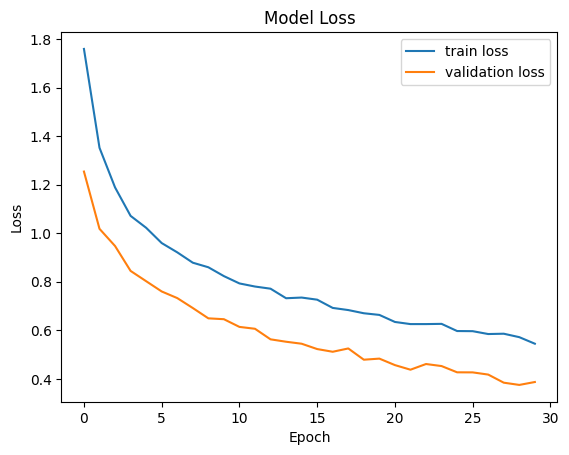

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

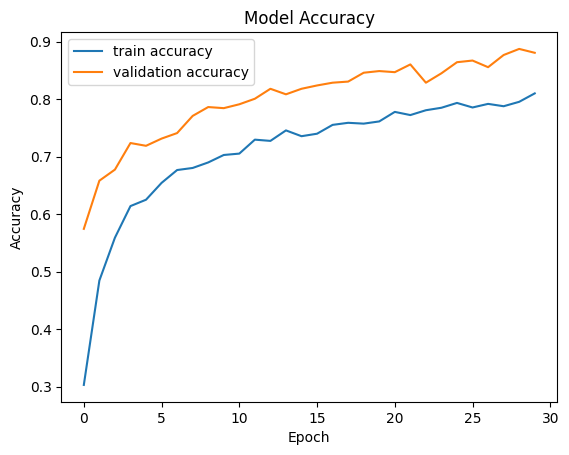

In [ ]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title ('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel ('Epoch')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(val_generator, verbose=1)
print(f"Akurasi pada data validasi: {accuracy * 100:.2f}%")


33/33 ━━━━━━━━━━━━━━━━━━━━ 54s 2s/step - accuracy: 0.9270 - loss: 0.2153
Akurasi pada data validasi: 93.26%


In [ ]:
import numpy as np
from google.colab import files
import keras.utils as image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

In [ ]:
# Tampilkan mapping label ke kelas
label_map = train_generator.class_indices
print("Label Mapping (nama kelas → label angka):")
print(label_map)


Label Mapping (nama kelas → label angka):
{'Cattleya': 0, 'Dendrobium': 1, 'Paphiopedilum': 2, 'Phalaenopsis': 3, 'Vanda': 4, 'Vanilla': 5}


In [ ]:
uploaded = files.upload()

Saving 84.cattleya-orchid-plant.jpg to 84.cattleya-orchid-plant.jpg


Saving 78.vanda-orchid-400-23543064.jpg to 78.vanda-orchid-400-23543064.jpg


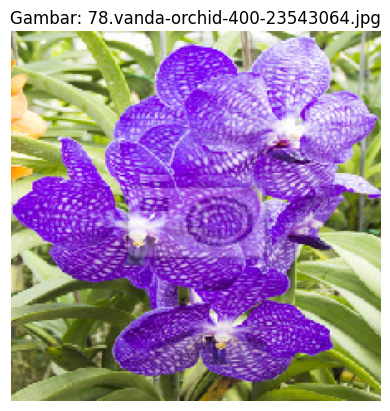

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Untuk Gambar: 78.vanda-orchid-400-23543064.jpg
Hasil Akhir Prediksinya: Vanda)
------------------------------


In [ ]:
from tensorflow.keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import keras

# --- Mapping label angka ke nama kelas ---
label_map = {
    0: "Cattleya",
    1: "Dendrobium",
    2: "Paphiopedilum",
    3: "Phalaenopsis",
    4: "Vanda",
    5: "Vanilla",
}

# Ukuran input model
IMAGE_SIZE = (224, 224)

# Load model yang sudah dilatih
trained_model = keras.models.load_model('best_model_mobilenetv2.h5')  # Ganti jika beda nama

# --- Proses pengunggahan file ---
uploaded = files.upload()  # Upload gambar

# Loop setiap file gambar
for fn in uploaded.keys():
    # Load dan tampilkan gambar
    img = load_img(fn, target_size=IMAGE_SIZE)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Gambar: {fn}")
    plt.show()

    # Pra-pemrosesan gambar
    x = keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0  # Normalisasi

    # Prediksi
    pred = trained_model.predict(x, batch_size=1)
    pred_class = np.argmax(pred, axis=1)[0]

    # Cek label prediksi
    label = label_map.get(pred_class, "Tidak terdeteksi")

    # Cetak hasil
    print(f"Untuk Gambar: {fn}")
    print(f"Hasil Akhir Prediksinya: {label})")
    print("-" * 30)


Saving 32.20861895_1465536710204335_7826164476052387123_o.jpg to 32.20861895_1465536710204335_7826164476052387123_o.jpg


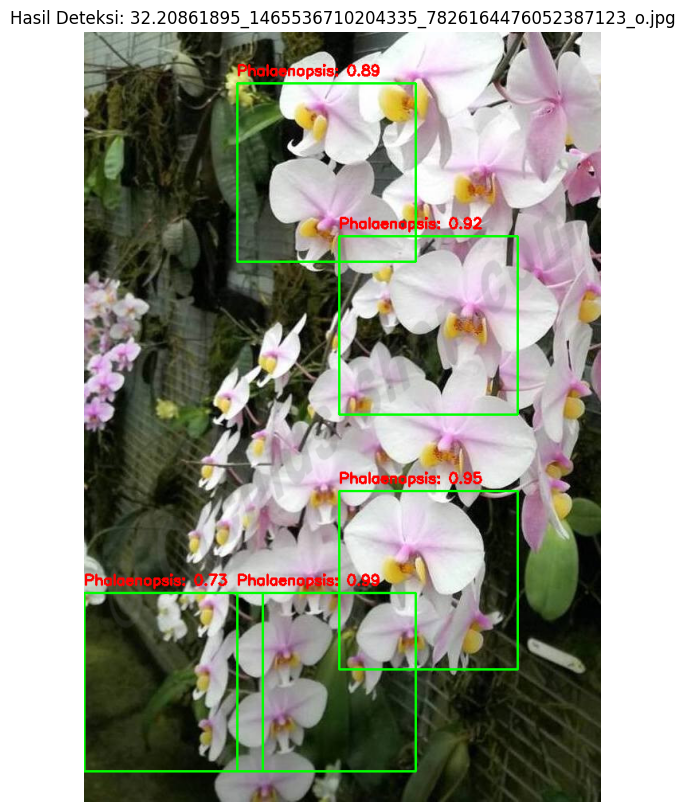

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files
from PIL import Image
from collections import Counter

# Load model dan label map
model = load_model('best_model_mobilenetv2.h5')
label_map = {
    0: "Cattleya",
    1: "Dendrobium",
    2: "Paphiopedilum",
    3: "Phalaenopsis",
    4: "Vanda",
    5: "Vanilla",
}

# Sliding window
def sliding_window(image, step=64, window_size=(224, 224)):
    for y in range(0, image.shape[0] - window_size[1] + 1, step):
        for x in range(0, image.shape[1] - window_size[0] + 1, step):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# Non-Maximum Suppression
def non_max_suppression_fast(boxes, scores, iou_threshold=0.3):
    if len(boxes) == 0:
        return []
    boxes = np.array(boxes)
    scores = np.array(scores)
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(scores)[::-1]
    selected = []
    while len(idxs) > 0:
        i = idxs[0]
        selected.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[1:]])
        yy1 = np.maximum(y1[i], y1[idxs[1:]])
        xx2 = np.minimum(x2[i], x2[idxs[1:]])
        yy2 = np.minimum(y2[i], y2[idxs[1:]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        iou = (w * h) / areas[idxs[1:]]
        idxs = idxs[np.where(iou <= iou_threshold)[0] + 1]
    return selected

# Deteksi objek dengan bounding box hanya untuk 1 kelas dominan
def detect_with_bbox(image, model, window_size=(224, 224), step=64, threshold=0.7):
    boxes, scores, labels = [], [], []

    for (x, y, window) in sliding_window(image, step=step, window_size=window_size):
        if window.shape[:2] != window_size:
            continue
        patch = cv2.resize(window, window_size)
        patch_input = np.expand_dims(patch / 255.0, axis=0)
        prediction = model.predict(patch_input, verbose=0)
        class_idx = np.argmax(prediction)
        confidence = prediction[0][class_idx]

        if confidence >= threshold:
            boxes.append([x, y, x + window_size[0], y + window_size[1]])
            scores.append(confidence)
            labels.append(class_idx)

    # NMS per kelas
    final_boxes = []
    for class_id in np.unique(labels):
        idxs = [i for i, lbl in enumerate(labels) if lbl == class_id]
        class_boxes = [boxes[i] for i in idxs]
        class_scores = [scores[i] for i in idxs]
        selected = non_max_suppression_fast(class_boxes, class_scores)
        for i in selected:
            final_boxes.append((class_boxes[i], class_scores[i], class_id))

    # Pilih kelas dominan
    all_labels = [class_id for (_, _, class_id) in final_boxes]
    if not all_labels:
        print("❌ Tidak ada objek terdeteksi.")
        return []

    label_counter = Counter(all_labels)
    dominant_class = label_counter.most_common(1)[0][0]

    # Filter hanya dari kelas dominan
    filtered_boxes = [info for info in final_boxes if info[2] == dominant_class]
    return filtered_boxes

# --- Upload gambar ---
uploaded = files.upload()

# Proses setiap gambar yang diunggah
for fn in uploaded.keys():
    # Load dan siapkan gambar
    pil_img = Image.open(fn).convert('RGB')
    image = np.array(pil_img)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Deteksi
    results = detect_with_bbox(image, model, threshold=0.7)

    # Visualisasi hasil
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for (box, score, class_id) in results:
        x1, y1, x2, y2 = box
        label = f"{label_map[class_id]}: {score:.2f}"
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.6, (255, 0, 0), 2)

    # Tampilkan hasil
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.title(f"Hasil Deteksi: {fn}")
    plt.show()


In [ ]:
pip install streamlit pillow tensorflow


In [ ]:
!pip install streamlit pyngrok --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


In [ ]:
# import streamlit as st
# import numpy as np
# import cv2
# from PIL import Image
# from collections import Counter
# from tensorflow.keras.models import load_model

# # --- Label map ---
# label_map = {
#     0: "Cattleya",
#     1: "Dendrobium",
#     2: "Paphiopedilum",
#     3: "Phalaenopsis",
#     4: "Vanda",
#     5: "Vanilla",
# }

# # --- Load model ---
# model = load_model('best_model_mobilenetv2.h5')

# st.title("🌸 Deteksi Anggrek Sliding Window")

# uploaded_file = st.file_uploader("Unggah Gambar", type=["jpg", "png"])

# def sliding_window(image, step=64, window_size=(224, 224)):
#     for y in range(0, image.shape[0] - window_size[1] + 1, step):
#         for x in range(0, image.shape[1] - window_size[0] + 1, step):
#             yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# def non_max_suppression_fast(boxes, scores, iou_threshold=0.3):
#     if len(boxes) == 0:
#         return []
#     boxes = np.array(boxes)
#     scores = np.array(scores)
#     x1 = boxes[:,0]
#     y1 = boxes[:,1]
#     x2 = boxes[:,2]
#     y2 = boxes[:,3]
#     areas = (x2 - x1 + 1) * (y2 - y1 + 1)
#     idxs = np.argsort(scores)[::-1]
#     selected = []
#     while len(idxs) > 0:
#         i = idxs[0]
#         selected.append(i)
#         xx1 = np.maximum(x1[i], x1[idxs[1:]])
#         yy1 = np.maximum(y1[i], y1[idxs[1:]])
#         xx2 = np.minimum(x2[i], x2[idxs[1:]])
#         yy2 = np.minimum(y2[i], y2[idxs[1:]])
#         w = np.maximum(0, xx2 - xx1 + 1)
#         h = np.maximum(0, yy2 - yy1 + 1)
#         iou = (w * h) / areas[idxs[1:]]
#         idxs = idxs[np.where(iou <= iou_threshold)[0] + 1]
#     return selected

# def detect_with_bbox(image, model, window_size=(224, 224), step=64, threshold=0.7):
#     boxes, scores, labels = [], [], []

#     for (x, y, window) in sliding_window(image, step=step, window_size=window_size):
#         if window.shape[:2] != window_size:
#             continue
#         patch = cv2.resize(window, window_size)
#         patch_input = np.expand_dims(patch / 255.0, axis=0)
#         prediction = model.predict(patch_input, verbose=0)
#         class_idx = np.argmax(prediction)
#         confidence = prediction[0][class_idx]
#         if confidence >= threshold:
#             boxes.append([x, y, x + window_size[0], y + window_size[1]])
#             scores.append(confidence)
#             labels.append(class_idx)

#     final_boxes = []
#     for class_id in np.unique(labels):
#         idxs = [i for i, lbl in enumerate(labels) if lbl == class_id]
#         class_boxes = [boxes[i] for i in idxs]
#         class_scores = [scores[i] for i in idxs]
#         selected = non_max_suppression_fast(class_boxes, class_scores)
#         for i in selected:
#             final_boxes.append((class_boxes[i], class_scores[i], class_id))

#     all_labels = [class_id for (_, _, class_id) in final_boxes]
#     if not all_labels:
#         return [], None

#     label_counter = Counter(all_labels)
#     dominant_class = label_counter.most_common(1)[0][0]
#     filtered_boxes = [info for info in final_boxes if info[2] == dominant_class]
#     return filtered_boxes, dominant_class

# if uploaded_file is not None:
#     img = Image.open(uploaded_file).convert('RGB')
#     st.image(img, caption="Gambar yang Diunggah", use_column_width=True)

#     img_cv = np.array(img)
#     img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)

#     results, dominant_class = detect_with_bbox(img_cv, model)

#     img_result = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
#     for (box, score, class_id) in results:
#         x1, y1, x2, y2 = box
#         label = f"{label_map[class_id]}: {score:.2f}"
#         cv2.rectangle(img_result, (x1, y1), (x2, y2), (0, 255, 0), 2)
#         cv2.putText(img_result, label, (x1, y1 - 10),
#                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

#     if results:
#         st.image(img_result, caption=f"Hasil Deteksi - Kelas Dominan: {label_map[dominant_class]}", use_column_width=True)
#     else:
#         st.warning("❌ Tidak ada objek terdeteksi.")


2025-06-28 09:58:07.951 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.954 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.957 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.959 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.960 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.962 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-28 09:58:07.968 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from PIL import Image
from tensorflow.keras.models import load_model
from collections import Counter

# --- Label Map
label_map = {
    0: "Cattleya",
    1: "Dendrobium",
    2: "Paphiopedilum",
    3: "Phalaenopsis",
    4: "Vanda",
    5: "Vanilla",
}

# --- Load Model ---
model = load_model('best_model_mobilenetv2.h5')

# --- Title ---
st.title("🌿 Deteksi Anggrek: Sliding Window + NMS + Bounding Box")
st.write(
    """
    Unggah gambar anggrek, sistem akan mendeteksi patch dengan Sliding Window + NMS.
    """
)

uploaded_file = st.file_uploader("📷 Unggah Gambar", type=["jpg", "png"])

# --- Sliding Window ---
def sliding_window(image, step=128, window_size=(224, 224)):
    for y in range(0, image.shape[0] - window_size[1] + 1, step):
        for x in range(0, image.shape[1] - window_size[0] + 1, step):
            yield (x, y, image[y:y + window_size[1], x:x + window_size[0]])

# --- Non-Maximum Suppression ---
def non_max_suppression_fast(boxes, scores, iou_threshold=0.3):
    if len(boxes) == 0:
        return []
    boxes = np.array(boxes)
    scores = np.array(scores)
    x1 = boxes[:, 0]
    y1 = boxes[:, 1]
    x2 = boxes[:, 2]
    y2 = boxes[:, 3]
    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    idxs = np.argsort(scores)[::-1]
    selected = []

    while len(idxs) > 0:
        i = idxs[0]
        selected.append(i)
        xx1 = np.maximum(x1[i], x1[idxs[1:]])
        yy1 = np.maximum(y1[i], y1[idxs[1:]])
        xx2 = np.minimum(x2[i], x2[idxs[1:]])
        yy2 = np.minimum(y2[i], y2[idxs[1:]])
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        iou = (w * h) / areas[idxs[1:]]
        idxs = idxs[np.where(iou <= iou_threshold)[0] + 1]

    return selected

# --- MAIN ---
if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB')
    st.image(img, caption="📸 Gambar Asli", use_container_width=True)

    img_cv = np.array(img)
    img_cv = cv2.cvtColor(img_cv, cv2.COLOR_RGB2BGR)
    img_result = img_cv.copy()

    boxes, scores, labels = [], [], []

    threshold = 0.5  # turunkan jika perlu
    step_size = 128  # makin kecil makin detil

    for (x, y, window) in sliding_window(img_cv, step=step_size):
        if window.shape[:2] != (224, 224):
            continue
        patch_input = np.expand_dims(window / 255.0, axis=0)
        pred = model.predict(patch_input, verbose=0)
        class_idx = np.argmax(pred)
        conf = pred[0][class_idx]

        if conf >= threshold:
            boxes.append([x, y, x + 224, y + 224])
            scores.append(conf)
            labels.append(class_idx)

    st.write(f"Jumlah patch lolos threshold: {len(boxes)}")

    # --- NMS per kelas ---
    final_boxes = []
    for class_id in np.unique(labels):
        idxs = [i for i, lbl in enumerate(labels) if lbl == class_id]
        class_boxes = [boxes[i] for i in idxs]
        class_scores = [scores[i] for i in idxs]
        selected = non_max_suppression_fast(class_boxes, class_scores)
        for i in selected:
            final_boxes.append((class_boxes[i], class_scores[i], class_id))

    st.write(f"Setelah NMS: {len(final_boxes)} kotak")

    if final_boxes:
        label_counter = Counter([c for (_, _, c) in final_boxes])
        dominant_class = label_counter.most_common(1)[0][0]

        img_vis = img_cv.copy()
        for (box, score, class_id) in final_boxes:
            if class_id == dominant_class:
                x1, y1, x2, y2 = box
                label = f"{label_map[class_id]}: {score:.2f}"
                cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(img_vis, label, (x1, max(y1 - 10, 0)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

        img_vis_rgb = cv2.cvtColor(img_vis, cv2.COLOR_BGR2RGB)
        st.image(img_vis_rgb, caption=f"📦 Bounding Box - Kelas Dominan: {label_map[dominant_class]}", use_container_width=True)
    else:
        st.warning("❌ Tidak ada patch lolos threshold.")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Masukkan authtoken ngrok
!ngrok config add-authtoken 2z7zyCG7IXhgMSdWz8VKZk4JNOw_4u78M3LvmgfHjsRsAcZM8

# Buka tunnel ke port 8501
public_url = ngrok.connect("http://localhost:8501")
print("🌐 Ngrok URL:", public_url)

# Jalankan Streamlit di background
!streamlit run app.py --server.headless true --server.port 8501 &


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
🌐 Ngrok URL: NgrokTunnel: "https://7201-34-125-189-89.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.189.89:8501



2025-06-28 11:33:16.554073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751110396.591033   32939 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751110396.602177   32939 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-28 11:33:20.710001: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1751110400.710187   32939 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13810 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
